In [2]:
#importing nltk
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sudeepthi\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [6]:
from nltk.util import pr
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn import svm
import re
import nltk
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
stopword=set(stopwords.words('english'))
data = pd.read_csv("labeled_data.csv.zip")
print(data.head())

   Unnamed: 0  count  hate_speech  offensive_language  neither  class  \
0           0      3            0                   0        3      2   
1           1      3            0                   3        0      1   
2           2      3            0                   3        0      1   
3           3      3            0                   2        1      1   
4           4      6            0                   6        0      1   

                                               tweet  
0  !!! RT @mayasolovely: As a woman you shouldn't...  
1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...  
2  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...  
3  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...  
4  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...  


In [7]:
data["labels"] = data["class"].map({0: "Hate Speech", 
                                    1: "Offensive Language", 
                                    2: "No Hate and Offensive"})
print(data.head())

   Unnamed: 0  count  hate_speech  offensive_language  neither  class  \
0           0      3            0                   0        3      2   
1           1      3            0                   3        0      1   
2           2      3            0                   3        0      1   
3           3      3            0                   2        1      1   
4           4      6            0                   6        0      1   

                                               tweet                 labels  
0  !!! RT @mayasolovely: As a woman you shouldn't...  No Hate and Offensive  
1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...     Offensive Language  
2  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...     Offensive Language  
3  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...     Offensive Language  
4  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...     Offensive Language  


In [8]:
data = data[["tweet", "labels"]]
print(data.head())

                                               tweet                 labels
0  !!! RT @mayasolovely: As a woman you shouldn't...  No Hate and Offensive
1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...     Offensive Language
2  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...     Offensive Language
3  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...     Offensive Language
4  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...     Offensive Language


In [9]:
#data cleaning
def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
data["tweet"] = data["tweet"].apply(clean)

In [10]:
#svm model building
x = np.array(data["tweet"])
y = np.array(data["labels"])

cv = CountVectorizer()
X = cv.fit_transform(x) # Fit the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
model = svm.SVC(kernel = 'linear', random_state = 0, C=1.0)
model.fit(X_train,y_train)

SVC(kernel='linear', random_state=0)

In [32]:
sample = "I dont want you to be happy"
data = cv.transform([sample]).toarray()
print(model.predict(data))

['Offensive Language']


In [48]:
#finding accuracy for svm model
y_pred=model.predict(X_test)
from sklearn.metrics import accuracy_score
score1 =accuracy_score(y_test, y_pred)
print("Test accuracy: {:.2f}%".format(score1*100))

Test accuracy: 88.84%


In [20]:
#decision tree model building
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [49]:
#finding accuracy of decision tree model
y_pred=clf.predict(X_test)
from sklearn.metrics import accuracy_score
score2 =accuracy_score(y_test, y_pred)
print("Test accuracy: {:.2f}%".format(score2*100))

Test accuracy: 87.58%


In [30]:
sample = "I dont think you can do it"
data = cv.transform([sample]).toarray()
print(clf.predict(data))

['No Hate and Offensive']


In [41]:
#building randomforest model
from sklearn.ensemble import RandomForestClassifier

data1 = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5,
                                       n_estimators=100, oob_score=True)
data1.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_jobs=-1, oob_score=True, random_state=42)

In [50]:
#finding random forest model accuracy
y_pred=data1.predict(X_test)
from sklearn.metrics import accuracy_score
score3 =accuracy_score(y_test, y_pred)
print("Test accuracy: {:.2f}%".format(score3*100))

Test accuracy: 77.45%


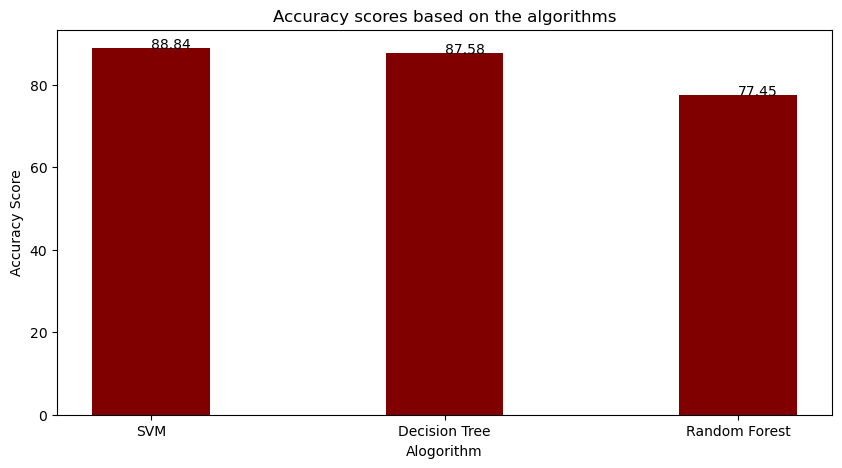

In [62]:
#plotting graph
import numpy as np
import matplotlib.pyplot as plt 

 
  
# creating the dataset
data = {'SVM':88.84, 'Decision Tree':87.58, 'Random Forest':77.45}
courses = list(data.keys())
values = list(data.values())
def addlabels(courses,values):
    for i in range(len(courses)):
        plt.text(i,values[i],values[i])
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(courses, values,color ='maroon', 
        width = 0.4)
addlabels(courses,values)
 
plt.xlabel("Alogorithm")
plt.ylabel("Accuracy Score")
plt.title("Accuracy scores based on the algorithms")
plt.show()

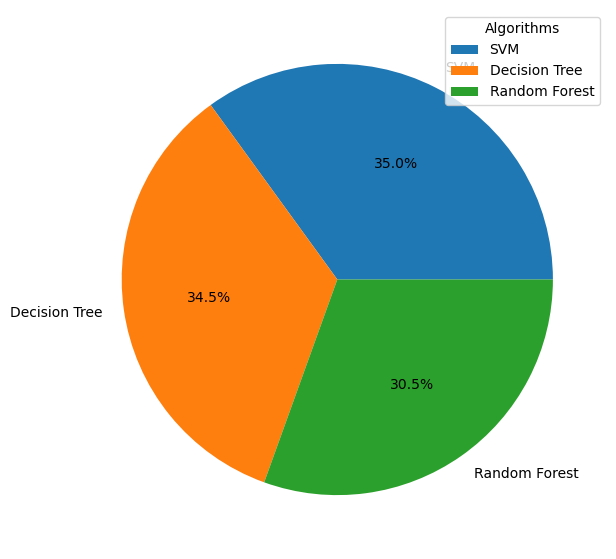

In [61]:
#pie chart
fig = plt.figure(figsize =(10, 7))
plt.pie(values, labels =courses,autopct='%.1f%%' )
plt.legend(title="Algorithms")
 
# show plot
plt.show()